In [1]:
# Import packages
# Import packages for data manipulation
import numpy as np
import pandas as pd
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)
# Import packages for data modeling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# This is the function that helps plot feature importance
from xgboost import plot_importance
# This module lets us save our models once we fit them.
import pickle 

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("Predictive maintenance oil and gas pipeline data\market_pipe_thickness_loss_dataset.csv")

In [3]:
# Display first few rows of the dataframe
df.head(10)

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical
5,600,16.75,Fiberglass,API 5L X52,600,67.3,2.06,5.21,31.10,11,Critical
6,200,9.94,Carbon Steel,ASTM A106 Grade B,1500,89.6,1.34,5.86,58.95,6,Critical
7,300,13.87,Carbon Steel,ASTM A106 Grade B,900,40.8,5.57,3.02,21.77,21,Moderate
8,150,8.86,Fiberglass,API 5L X65,300,3.2,13.84,2.47,27.88,19,Moderate
9,800,25.78,Stainless Steel,ASTM A333 Grade 6,150,11.6,18.68,0.53,2.06,1,Normal


In [4]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [5]:
df.shape

(1000, 11)

In [6]:
# Gather descriptive statistics about the data
df.describe()

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,522.000000,16.073530,1004.100000,42.595600,9.745990,4.886300,46.747560,12.961000
std,443.703587,10.548358,812.843099,41.127071,5.817492,2.901123,46.602553,7.135993
min,50.000000,3.000000,150.000000,-50.000000,0.000000,0.010000,0.080000,1.000000
25%,150.000000,7.357500,300.000000,13.400000,4.492500,2.365000,15.665000,7.000000
50%,300.000000,12.930000,900.000000,41.200000,9.720000,4.915000,31.660000,13.000000
75%,800.000000,23.027500,1500.000000,69.150000,14.832500,7.432500,61.035000,19.000000
max,1500.000000,49.530000,2500.000000,149.700000,20.000000,9.990000,318.750000,25.000000


In [7]:
# Check for missing values
df.isna().sum()

Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                       0
Max_Pressure_psi            0
Temperature_C               0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Condition                   0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
df[df['Material_Loss_Percent'] > 100]

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
13,150,5.19,HDPE,ASTM A333 Grade 6,300,43.6,16.02,6.12,117.92,13,Critical
15,100,6.00,Fiberglass,API 5L X65,1500,60.1,18.79,7.01,116.83,21,Critical
21,100,5.68,Carbon Steel,ASTM A106 Grade B,1500,45.3,12.17,7.59,133.63,10,Critical
34,50,4.55,PVC,ASTM A333 Grade 6,600,51.7,14.89,8.91,195.82,1,Critical
35,50,4.05,PVC,ASTM A333 Grade 6,150,63.0,16.94,9.53,235.31,1,Critical
...,...,...,...,...,...,...,...,...,...,...,...
967,100,6.37,Carbon Steel,API 5L X42,900,37.8,2.89,7.99,125.43,13,Critical
973,150,5.98,Carbon Steel,API 5L X42,1500,-7.2,11.61,6.32,105.69,1,Critical
981,200,7.28,PVC,API 5L X65,600,54.1,19.07,9.18,126.10,11,Critical
987,100,4.23,Fiberglass,API 5L X52,300,24.2,17.16,6.84,161.70,17,Critical


In [10]:
df = df[df['Material_Loss_Percent'] <= 100]

In [11]:
df.describe()

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,577.525539,17.511476,1001.305335,42.486493,9.728751,4.509058,32.966254,12.876277
std,443.712394,10.423854,808.720931,40.912552,5.813849,2.837706,24.644901,7.096855
min,50.000000,3.000000,150.000000,-50.000000,0.000000,0.010000,0.080000,1.000000
25%,250.000000,8.990000,300.000000,13.100000,4.510000,2.090000,13.490000,7.000000
50%,400.000000,14.810000,900.000000,41.500000,9.650000,4.430000,27.880000,13.000000
75%,800.000000,24.250000,1500.000000,69.000000,14.820000,6.960000,47.730000,19.000000
max,1500.000000,49.530000,2500.000000,149.700000,20.000000,9.990000,99.330000,25.000000


In [12]:
df.shape

(881, 11)

In [13]:
df['Material'].unique()

array(['Carbon Steel', 'PVC', 'HDPE', 'Fiberglass', 'Stainless Steel'],
      dtype=object)

In [14]:
df['Grade'].unique()

array(['ASTM A333 Grade 6', 'ASTM A106 Grade B', 'API 5L X52',
       'API 5L X42', 'API 5L X65'], dtype=object)

In [15]:
df['Condition'].unique()

array(['Moderate', 'Critical', 'Normal'], dtype=object)

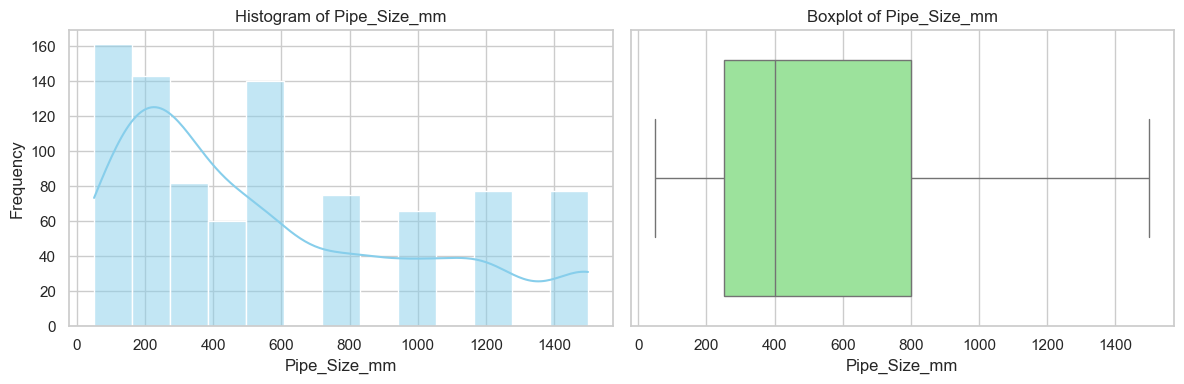

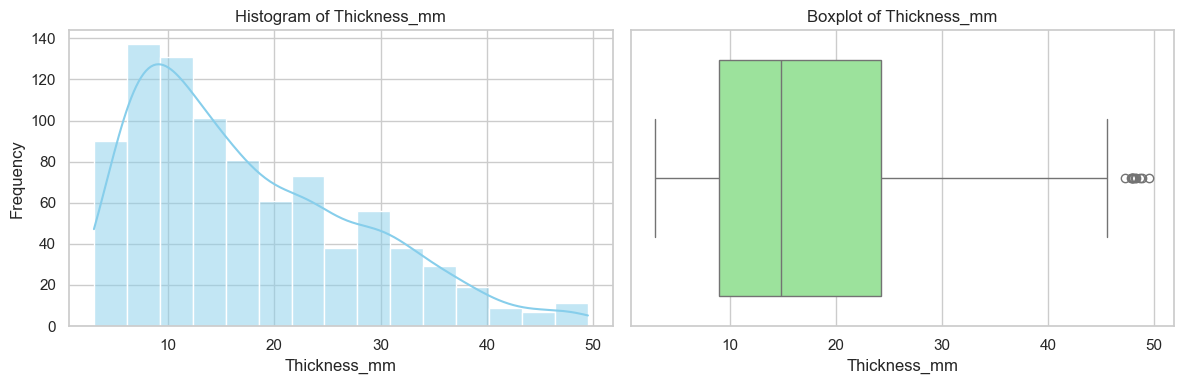

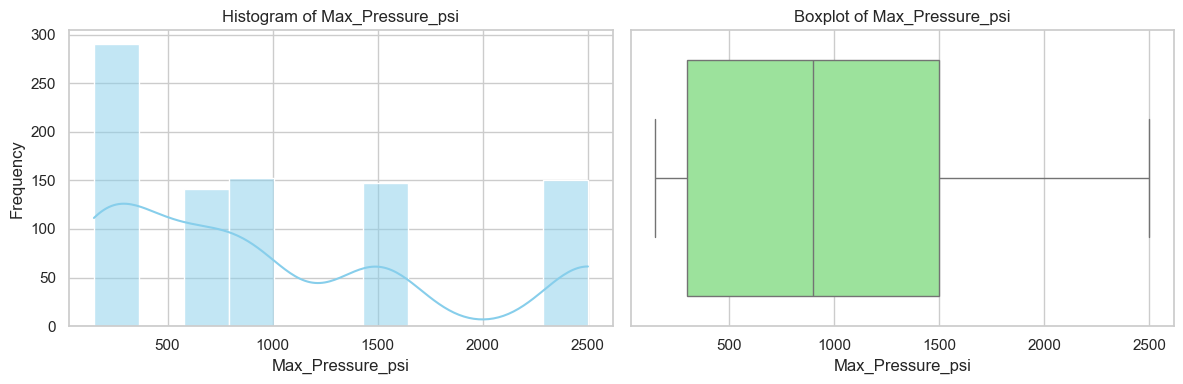

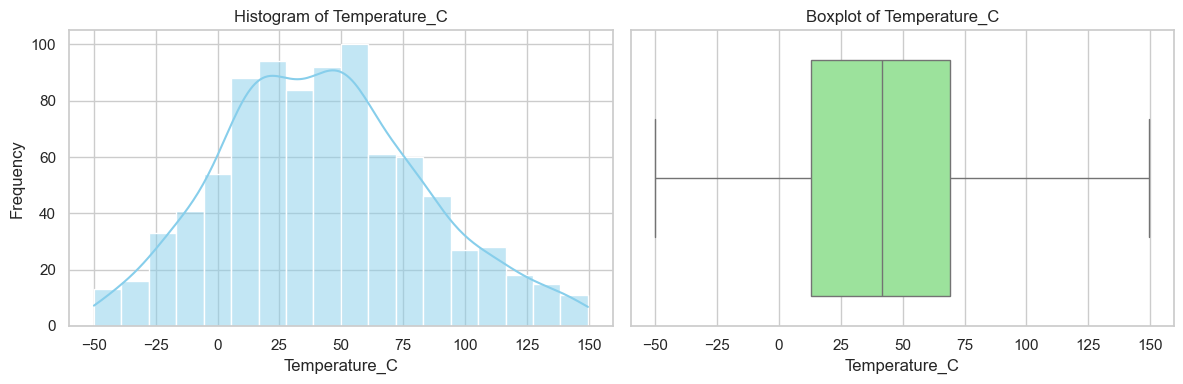

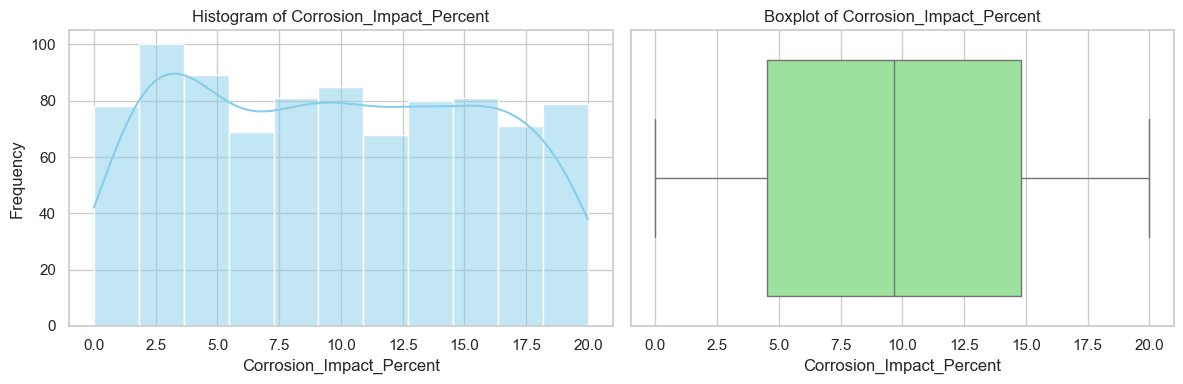

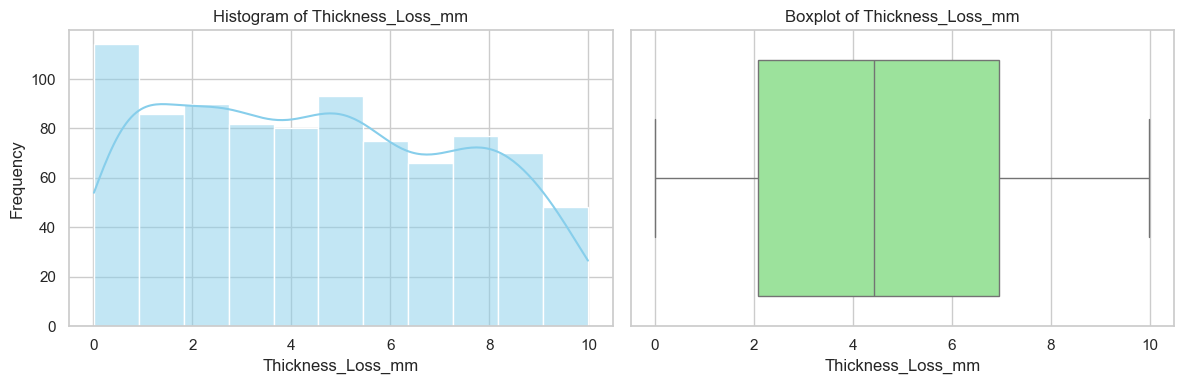

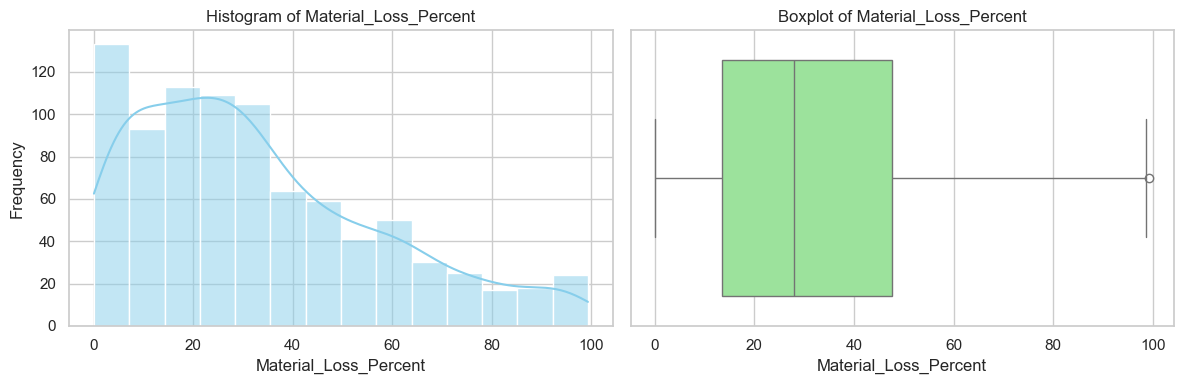

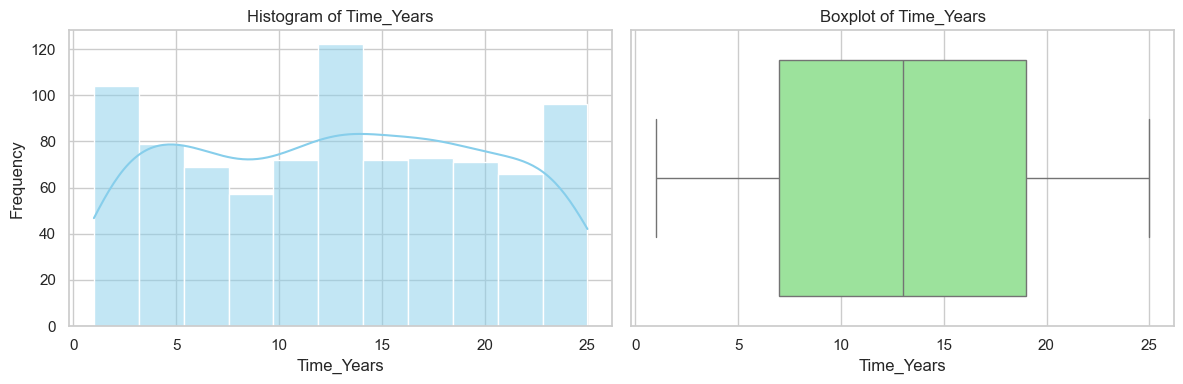

In [16]:
# List of numerical columns to visualize
num_cols = [
    'Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi', 'Temperature_C',
    'Corrosion_Impact_Percent', 'Thickness_Loss_mm', 'Material_Loss_Percent', 'Time_Years'
]

# Set up the plotting style
sns.set(style="whitegrid")

# Loop through each column and plot histogram + boxplot
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


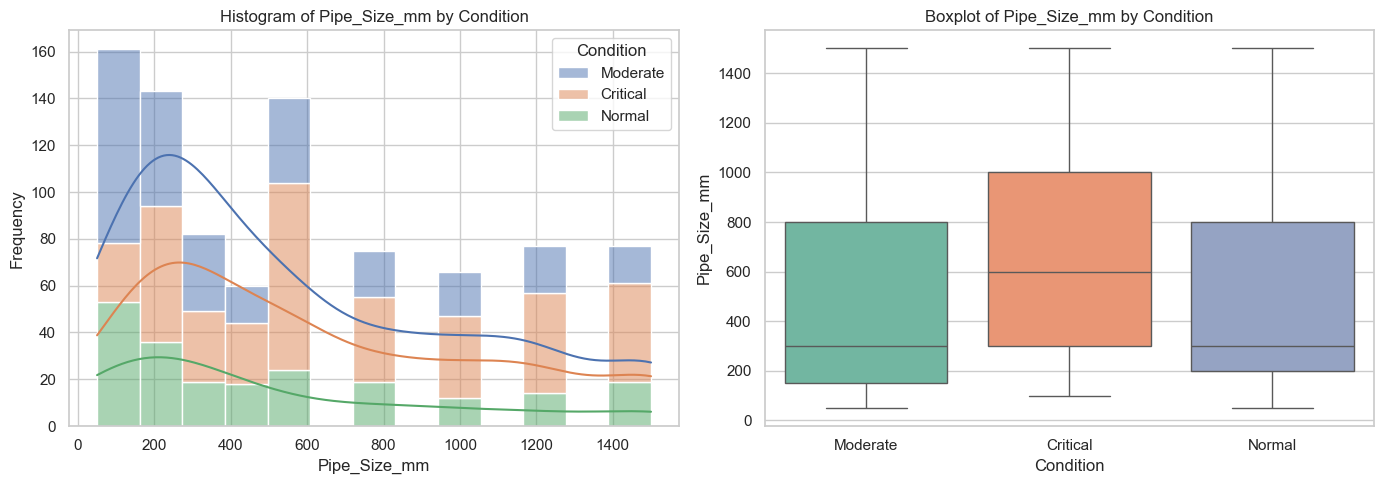

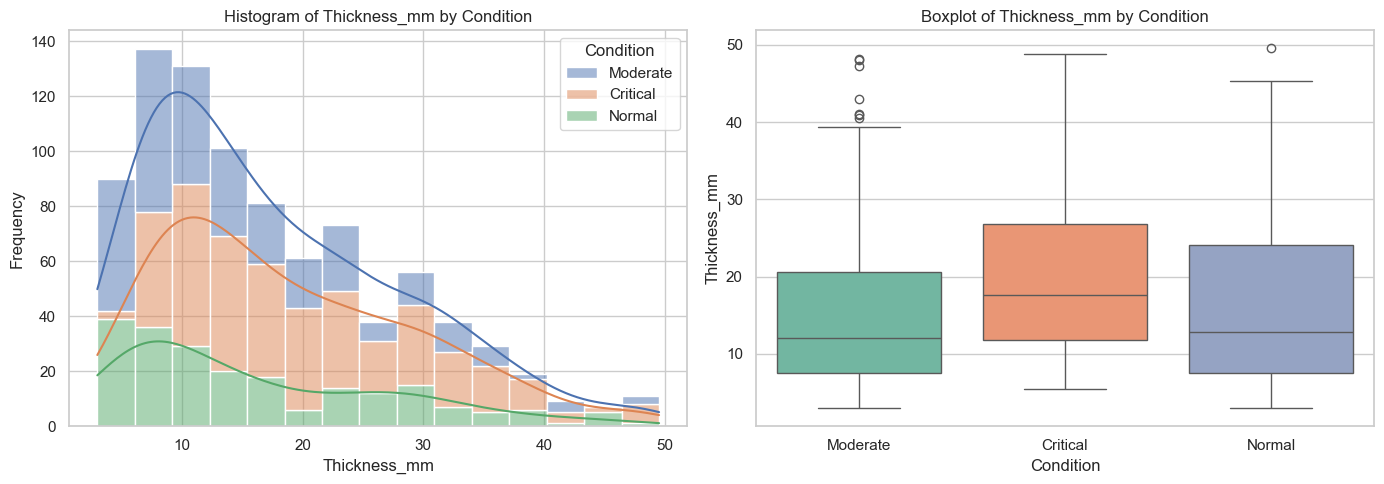

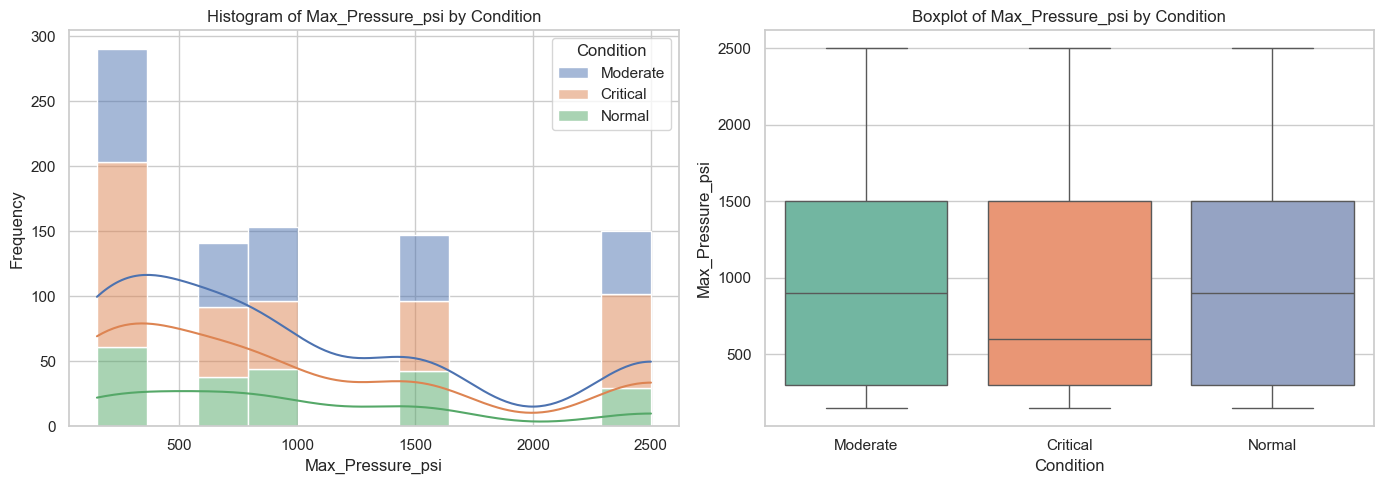

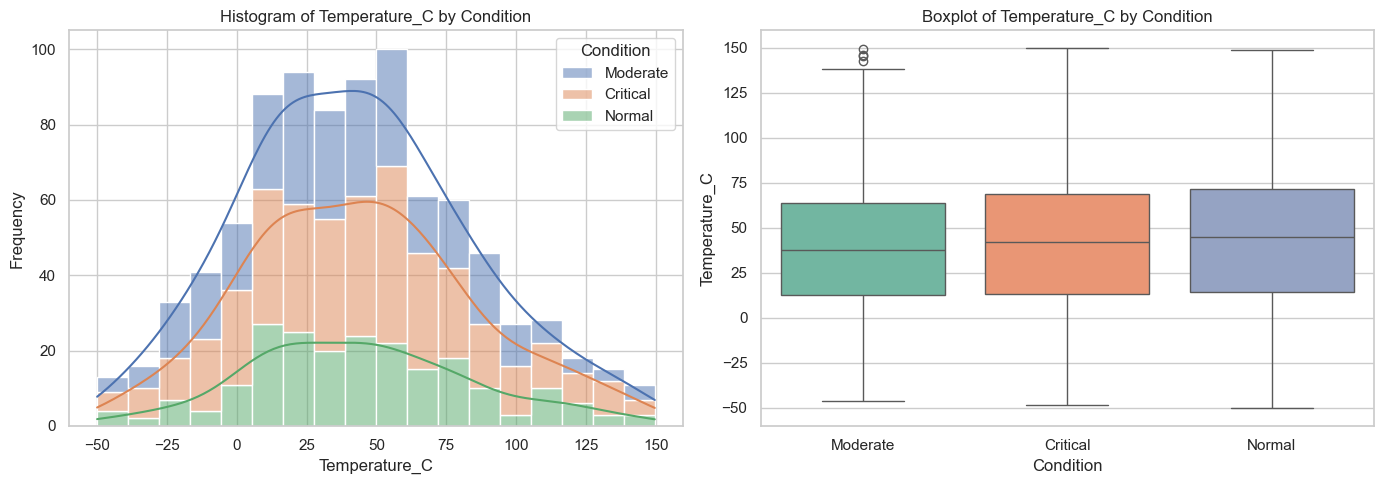

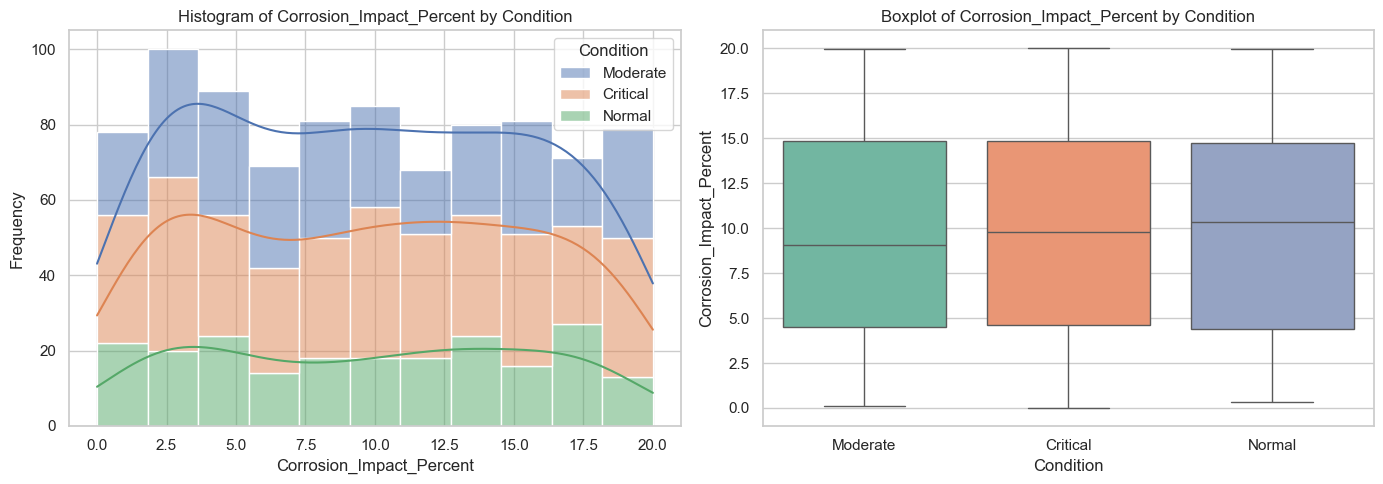

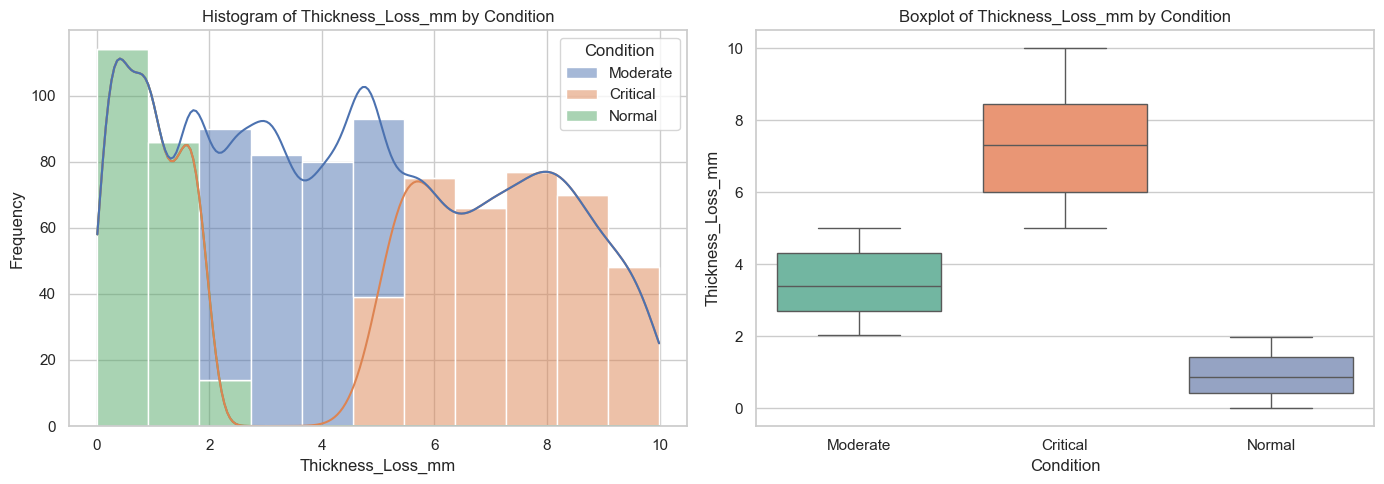

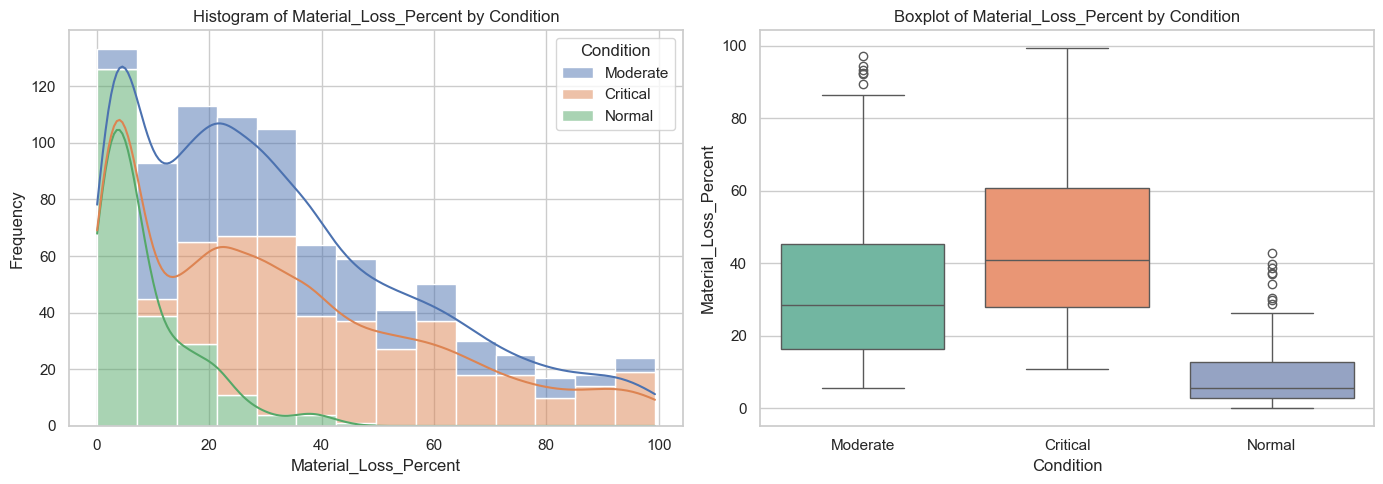

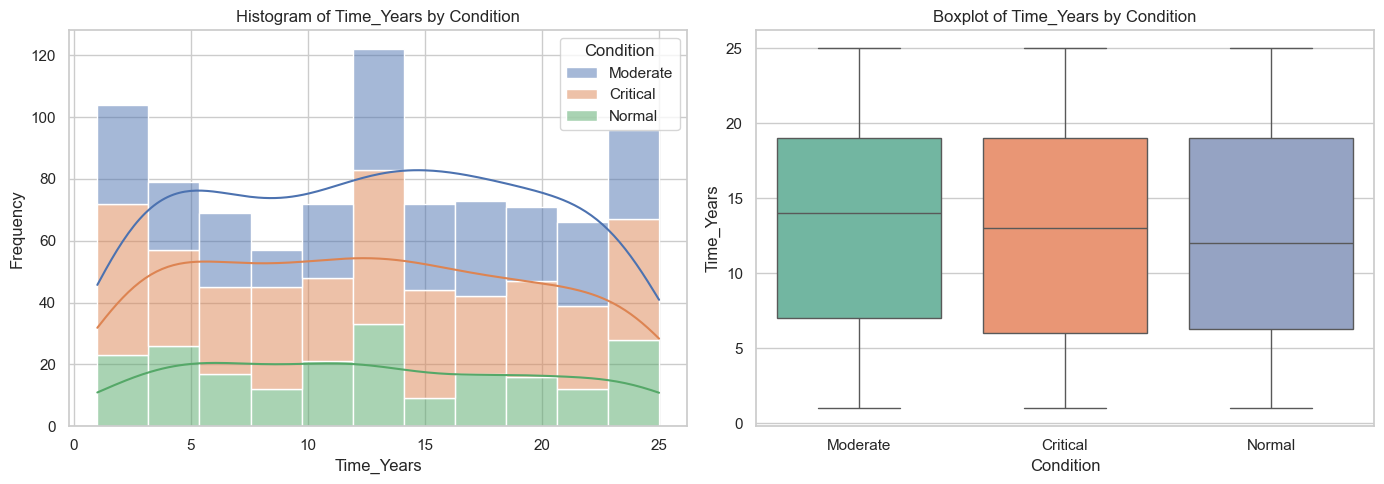

In [17]:
# Numerical columns to visualize
num_cols = [
    'Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi', 'Temperature_C',
    'Corrosion_Impact_Percent', 'Thickness_Loss_mm', 'Material_Loss_Percent', 'Time_Years'
]

sns.set(style="whitegrid")

# Loop through each column and plot histograms by Condition
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram segmented by Condition
    sns.histplot(data=df, x=col, hue="Condition", kde=True, multiple="stack", ax=axes[0])
    axes[0].set_title(f"Histogram of {col} by Condition")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    
    # Boxplot segmented by Condition
    sns.boxplot(data=df, x="Condition", y=col, hue="Condition", ax=axes[1], palette="Set2", legend=False)
    axes[1].set_title(f"Boxplot of {col} by Condition")
    axes[1].set_xlabel("Condition")
    axes[1].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()


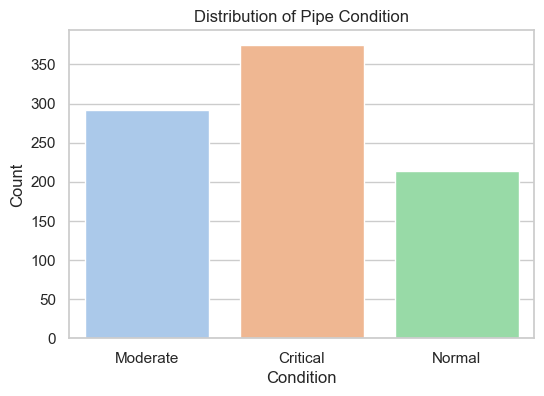

Condition
Critical    375
Moderate    292
Normal      214
Name: count, dtype: int64
Condition
Critical    0.43
Moderate    0.33
Normal      0.24
Name: proportion, dtype: float64


In [18]:
# Count plot for Condition
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Condition', hue="Condition", data=df, palette='pastel')
plt.title("Distribution of Pipe Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

# Print value counts
print(df['Condition'].value_counts())
print(df['Condition'].value_counts(normalize=True).round(2))


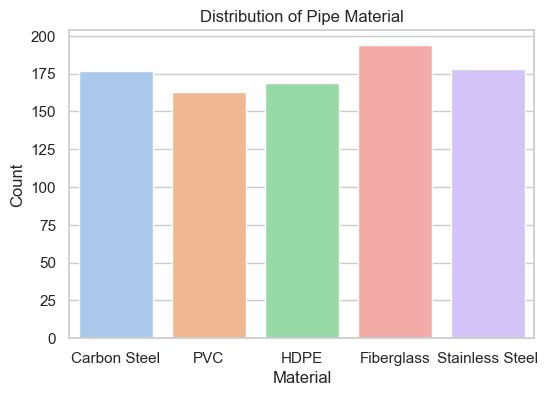

Material
Fiberglass         194
Stainless Steel    178
Carbon Steel       177
HDPE               169
PVC                163
Name: count, dtype: int64
Material
Fiberglass         0.22
Stainless Steel    0.20
Carbon Steel       0.20
HDPE               0.19
PVC                0.19
Name: proportion, dtype: float64


In [19]:
# Count plot for Condition
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Material', hue='Material', data=df, palette='pastel', legend=False)
plt.title("Distribution of Pipe Material")
plt.xlabel("Material")
plt.ylabel("Count")
plt.show()

# Print value counts
print(df['Material'].value_counts())
print(df['Material'].value_counts(normalize=True).round(2))


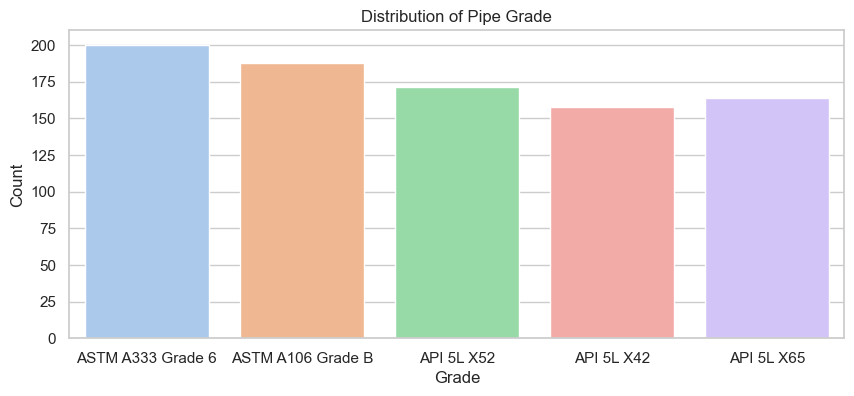

Grade
ASTM A333 Grade 6    200
ASTM A106 Grade B    188
API 5L X52           171
API 5L X65           164
API 5L X42           158
Name: count, dtype: int64
Grade
ASTM A333 Grade 6    0.23
ASTM A106 Grade B    0.21
API 5L X52           0.19
API 5L X65           0.19
API 5L X42           0.18
Name: proportion, dtype: float64


In [20]:
# Count plot for Condition
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(x='Grade', hue = 'Grade', data=df, palette='pastel',legend=False)
plt.title("Distribution of Pipe Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Print value counts
print(df['Grade'].value_counts())
print(df['Grade'].value_counts(normalize=True).round(2))


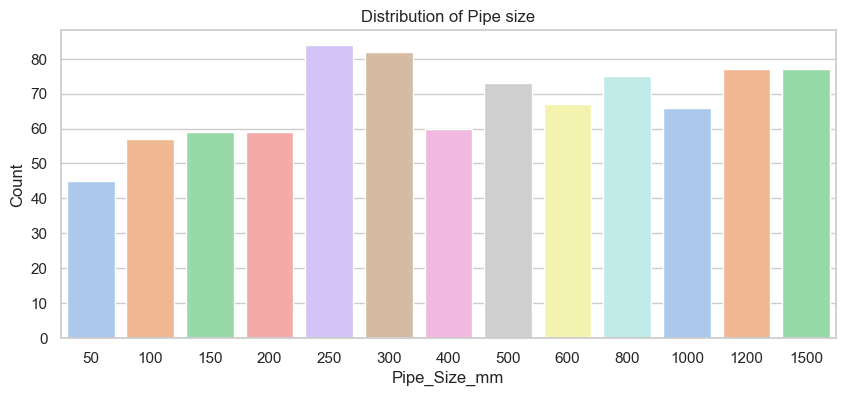

Pipe_Size_mm
250     84
300     82
1200    77
1500    77
800     75
500     73
600     67
1000    66
400     60
200     59
150     59
100     57
50      45
Name: count, dtype: int64
Pipe_Size_mm
250     0.10
300     0.09
1200    0.09
1500    0.09
800     0.09
500     0.08
600     0.08
1000    0.07
400     0.07
200     0.07
150     0.07
100     0.06
50      0.05
Name: proportion, dtype: float64


In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(x='Pipe_Size_mm',hue = 'Pipe_Size_mm', data=df, palette='pastel', legend=False)
plt.title("Distribution of Pipe size")
plt.xlabel("Pipe_Size_mm")
plt.ylabel("Count")
plt.show()

# Print value counts
print(df['Pipe_Size_mm'].value_counts())
print(df['Pipe_Size_mm'].value_counts(normalize=True).round(2))

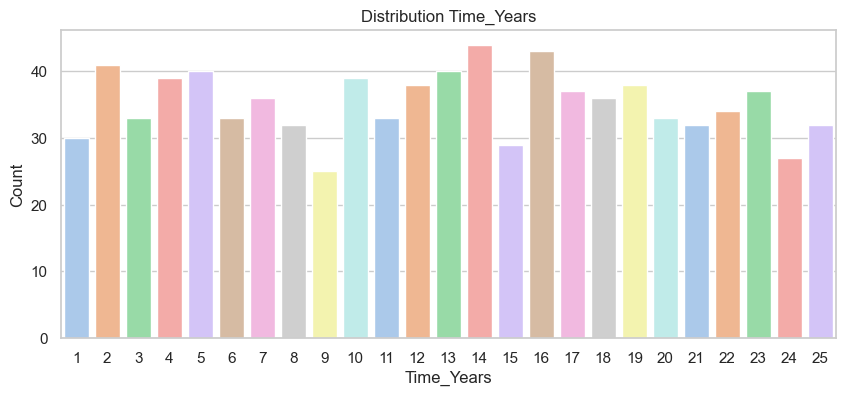

Time_Years
14    44
16    43
2     41
13    40
5     40
4     39
10    39
12    38
19    38
17    37
23    37
18    36
7     36
22    34
20    33
6     33
11    33
3     33
21    32
25    32
8     32
1     30
15    29
24    27
9     25
Name: count, dtype: int64
Time_Years
14    0.05
16    0.05
2     0.05
13    0.05
5     0.05
4     0.04
10    0.04
12    0.04
19    0.04
17    0.04
23    0.04
18    0.04
7     0.04
22    0.04
20    0.04
6     0.04
11    0.04
3     0.04
21    0.04
25    0.04
8     0.04
1     0.03
15    0.03
24    0.03
9     0.03
Name: proportion, dtype: float64


In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(x='Time_Years', hue='Time_Years', data=df, palette='pastel', legend=False)
plt.title("Distribution Time_Years")
plt.xlabel("Time_Years")
plt.ylabel("Count")
plt.show()

# Print value counts
print(df['Time_Years'].value_counts())
print(df['Time_Years'].value_counts(normalize=True).round(2))

In [23]:
#Logic: Higher pressure sustained over longer time = higher fatigue risk
# Formula: Pressure * Time
df['Pressure_Time_Exposure'] = df['Max_Pressure_psi'] * df['Time_Years']

In [24]:
# Logic: Extreme temperatures (hot or cold) stress materials more than moderate ones.
# We assume standard ambient temp is roughly 20°C.
df['Temp_Deviation'] = abs(df['Temperature_C'] - 20)

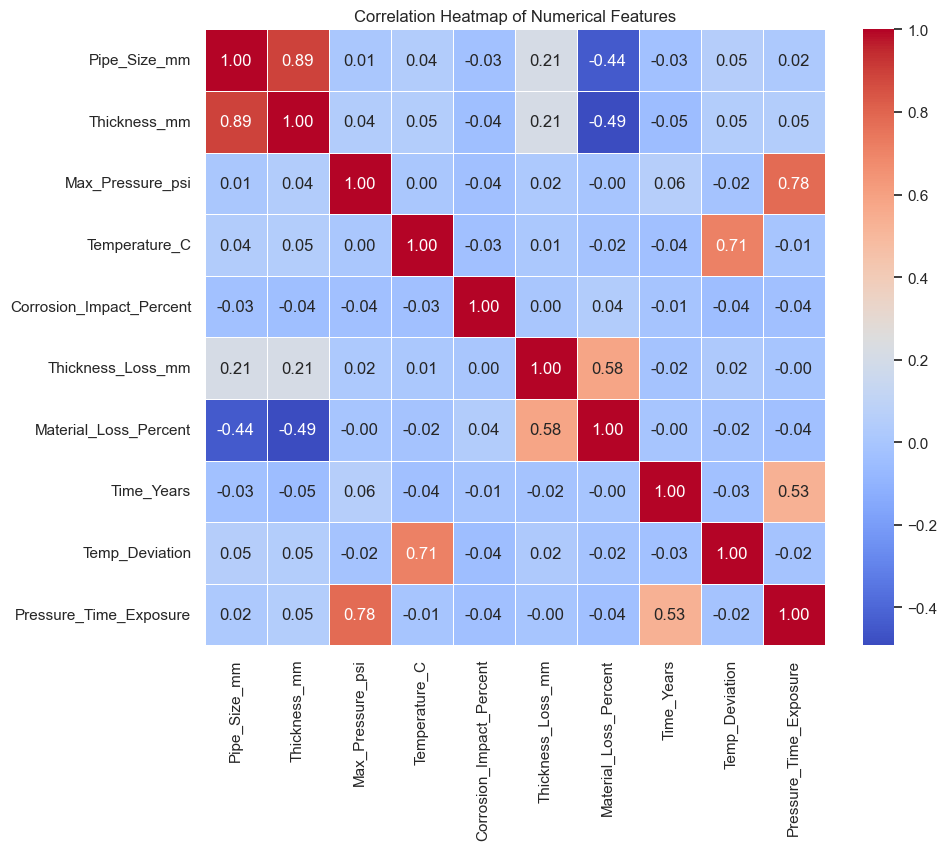

In [25]:
# Select only numerical columns
num_cols = [
    'Pipe_Size_mm','Thickness_mm','Max_Pressure_psi','Temperature_C',
    'Corrosion_Impact_Percent','Thickness_Loss_mm','Material_Loss_Percent','Time_Years','Temp_Deviation','Pressure_Time_Exposure'
]

# Compute correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [26]:
cols_to_drop = ['Thickness_Loss_mm', 'Material_Loss_Percent', 'Corrosion_Impact_Percent']
df_clean = df.drop(columns=cols_to_drop)

In [27]:
#“These features were selected as they directly influence pipeline degradation through mechanical stress, 
#corrosion processes, and long-term material fatigue.”
numerical_features = [
    'Pipe_Size_mm',
    'Thickness_mm',
    'Max_Pressure_psi',
    'Temperature_C',
    'Time_Years',
    'Pressure_Time_Exposure',  # New Feature
    'Temp_Deviation'           # New Feature
]

categorical_features = [
    'Material',
    'Grade'
]

In [28]:
X = df_clean[numerical_features + categorical_features]
y = df_clean['Condition']

In [29]:
le = LabelEncoder()
y_encoded  = le.fit_transform(df['Condition'])
print(le.classes_)

['Critical' 'Moderate' 'Normal']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [31]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [32]:
# Define the SMOTE instance
smote = SMOTE(random_state=42)

In [33]:
# Logistic Regression
logreg_params = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],  # 'l1' if solver='liblinear'
    'classifier__solver': ['lbfgs', 'saga']
}


In [34]:
logreg_pipeline_smote = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))])


In [35]:
search_logreg = GridSearchCV(logreg_pipeline_smote, logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
search_logreg.fit(X_train, y_train)

print("Best parameters:", search_logreg.best_params_)
print("Best score:", search_logreg.best_score_)


Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best score: 0.4489159067882472


In [36]:
logreg_preds = search_logreg.best_estimator_.predict(X_test)

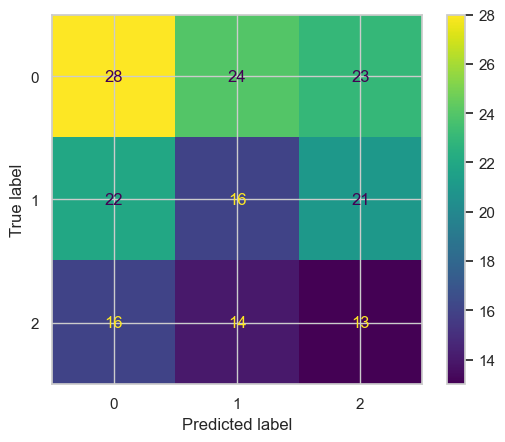

In [37]:
cm = confusion_matrix(y_test, logreg_preds, labels=search_logreg.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search_logreg.best_estimator_.classes_)
disp.plot(values_format='')

In [38]:
# SVC
svc_params = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'classifier__kernel': ['rbf', 'linear'],
    'classifier__class_weight': ['balanced']

}

In [39]:
#pipeline with SVC
svc_pipeline_smote = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('classifier', SVC(probability=True, random_state=42))
])


In [40]:
search_svc = GridSearchCV(svc_pipeline_smote, svc_params, cv=5, scoring='accuracy', n_jobs=-1)
search_svc.fit(X_train, y_train)

print("Best parameters:", search_svc.best_params_)
print("Best score:", search_svc.best_score_)

Best parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best score: 0.4603242147922998


In [41]:
svc_preds = search_svc.best_estimator_.predict(X_test)

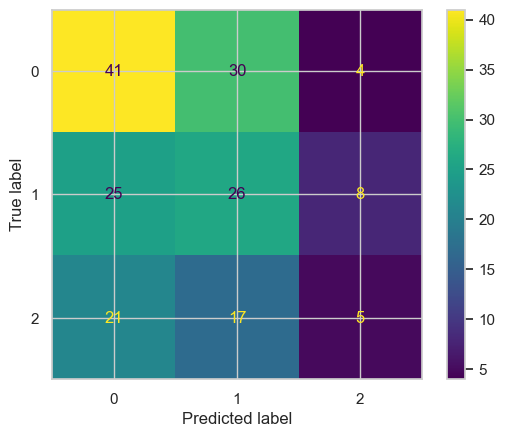

In [42]:
cm = confusion_matrix(y_test, svc_preds, labels=search_svc.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search_svc.best_estimator_.classes_)
disp.plot(values_format='')

In [43]:
# Random Forest
rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

In [44]:
#pipeline with RandomForest
rf_pipeline_smote = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [45]:
search_rf = GridSearchCV(rf_pipeline_smote, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
search_rf.fit(X_train, y_train)

print("Best parameters:", search_rf.best_params_)
print("Best score:", search_rf.best_score_)

Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best score: 0.4844376899696049


In [46]:
rf_preds = search_rf.best_estimator_.predict(X_test)

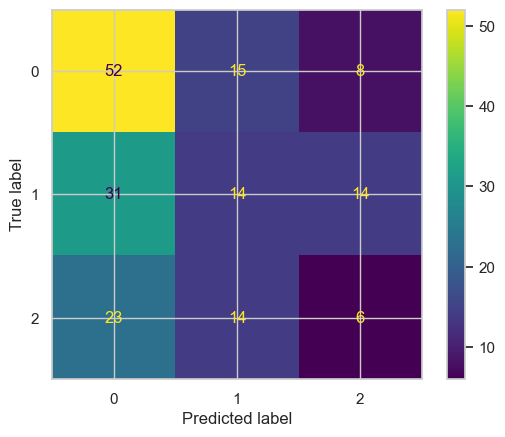

In [47]:
cm = confusion_matrix(y_test, rf_preds, labels=search_rf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search_rf.best_estimator_.classes_)
disp.plot(values_format='')

In [48]:
# XGBoost “XGBoost was selected as the final model due to its superior class-wise performance, particularly higher recall for critical conditions, 
# while maintaining overall stability across all classes.”
xgb_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

In [49]:
xgb_pipeline_smote = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('classifier', XGBClassifier(random_state=42))
])


In [50]:
search_xgb = GridSearchCV(xgb_pipeline_smote, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
search_xgb.fit(X_train, y_train)

print("Best parameters:", search_xgb.best_params_)
print("Best score:", search_xgb.best_score_)

Best parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best score: 0.47306990881458966


In [51]:
xgb_preds = search_xgb.best_estimator_.predict(X_test)

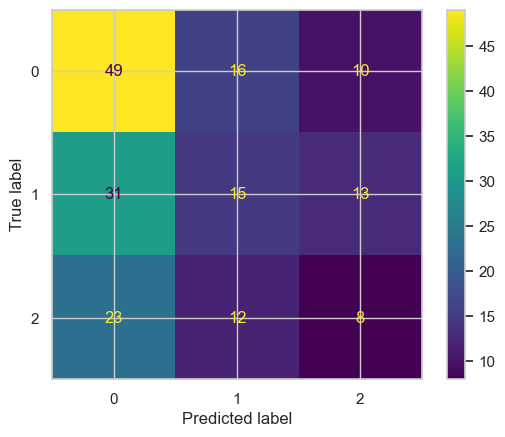

In [52]:
cm = confusion_matrix(y_test, xgb_preds, labels=search_xgb.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search_xgb.best_estimator_.classes_)
disp.plot(values_format='')

In [53]:
def evaluate_model(name, search, X_test, y_test):
    #print(f"\n🔍 {name} Evaluation")
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    #print("Classification Report:")
    #print(classification_report(y_test, y_pred, digits=3))

    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return {
        'Model': name,
        'CV Accuracy': search.best_score_,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        #'Best Params': search.best_params_
    }

In [54]:
# Initialize summary list first
summary = []

# Append model evaluations
summary.append(evaluate_model('XGBoost', search_xgb, X_test, y_test))
summary.append(evaluate_model('RandomForest', search_rf, X_test, y_test))
summary.append(evaluate_model('SVC', search_svc, X_test, y_test))
summary.append(evaluate_model('LogisticRegression', search_logreg, X_test, y_test))



In [55]:
# “Most misclassifications occur between Moderate and Critical classes, 
# reflecting the gradual nature of pipeline degradation rather than abrupt failure states.”
#“Recall for the Critical class was prioritized, as false negatives represent a significant safety and operational risk.”
#“In practice, the model can be integrated into maintenance planning systems to flag high-risk pipelines and prioritize inspections, 
#enabling a shift from time-based to condition-based maintenance.

In [56]:
# Now create the DataFrame
summary_df = pd.DataFrame(summary)

# Display the summary
print(summary_df)

                Model  CV Accuracy  Precision    Recall  F1 Score
0             XGBoost     0.473070   0.380552  0.406780  0.383855
1        RandomForest     0.484438   0.368452  0.406780  0.376032
2                 SVC     0.460324   0.389862  0.406780  0.386283
3  LogisticRegression     0.448916   0.333936  0.322034  0.325849


In [57]:
 path = r''

In [58]:
def write_pickle(path, model_object, save_as: str):
    with open(path + '\\' + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def load_pickle(path, save_as: str):
    with open(path + '\\' + save_as + '.pickle', 'rb') as to_read:
        return pickle.load(to_read)

In [59]:
#Save model
write_pickle(path, search_xgb, 'xgb-model-1')

# Load model later
loaded_xgb = load_pickle(path, 'xgb-model-1')
preds = loaded_xgb.predict(X_test)